In [1]:
#Importing libraries that we will be using
%matplotlib inline
import statsmodels.api as sm
import numpy as np 
import scipy
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings(action="ignore")
import seaborn as sns

In [2]:
# unzip the big data
from zipfile import ZipFile
data_loc = '../newDataTest/ABtwoCampaignEngView.csv.zip'
with ZipFile(data_loc, 'r') as zip_ref:
        zip_ref.extractall("../newDataTest/")

In [3]:
#Reading our data
df=pd.read_csv('../newDataTest/ABtwoCampaignEngView.csv', index_col = False)
df.drop('Unnamed: 0', inplace=True, axis=1)
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,8ec30aff-2332-4a1f-9330-b93abb32bc94,control,<built-in method date of Timestamp object at 0...,15,LG,156,6,0.0,0.0
1,4e1bcb56-357c-4186-9d39-3be82e3519f1,control,<built-in method date of Timestamp object at 0...,7,Samsung,162,6,0.0,0.0
2,dd6ec327-fcfd-4a80-89c0-dccd3dd80f09,control,<built-in method date of Timestamp object at 0...,14,Apple,178,15,0.0,0.0
3,b5222d0f-39e3-4c02-a12f-1ef09d4f861f,control,<built-in method date of Timestamp object at 0...,22,Apple,167,15,0.0,0.0
4,9428377d-1504-4407-87c2-ce518f67eb87,control,<built-in method date of Timestamp object at 0...,21,Samsung,155,15,0.0,0.0


# Data Preparation

In [4]:
#Adding scripts path
import sys
sys.path.insert(0,'../scripts/')
from data_preProcess import data_preProcess
from data_info import dataframeInfo 
from data_visualization import exploration

In [5]:
# object creation
data_preProcess = data_preProcess(df)
data_info = dataframeInfo(df)

In [6]:
# getting data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912712 entries, 0 to 912711
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   auction_id   912712 non-null  object 
 1   experiment   912712 non-null  object 
 2   date         912712 non-null  object 
 3   hour         912712 non-null  int64  
 4   device_make  912712 non-null  object 
 5   platform_os  912712 non-null  int64  
 6   browser      912712 non-null  int64  
 7   yes          912712 non-null  float64
 8   no           912712 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 62.7+ MB


In [7]:
# getting missing value column with percentage
data_info.find_column_based_missing_percentage()

,total_missing_values,missing_percentage
auction_id,0,0.0 %
experiment,0,0.0 %
date,0,0.0 %
hour,0,0.0 %
device_make,0,0.0 %
platform_os,0,0.0 %
browser,0,0.0 %
yes,0,0.0 %
no,0,0.0 %


In [8]:
# finding duplicate rows
data_info.find_duplicates()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no


In [9]:
# find unique value counts on columns
data_info.find_dataframe_columns_unique_value_count()

,Unique Value Count
experiment,2
yes,2
no,2
browser,9
hour,24
platform_os,68
device_make,255
auction_id,892951
date,912712


In [10]:
# finding the size and shape
df.shape

(912712, 9)

* Because the auction id has a smaller count than the data form, some people may see the ad and respond to it multiple times.

In [11]:
# find memory usage of each column
data_info.find_memory_usage()

Current DataFrame Memory Usage of columns is :


Index              128
auction_id     7301696
experiment     7301696
date           7301696
hour           7301696
device_make    7301696
platform_os    7301696
browser        7301696
yes            7301696
no             7301696
dtype: int64

In [12]:
# correlation among columns
data_info.find_matrix_correlation()

,hour,platform_os,browser,yes,no
hour,1.000000,-0.010857,0.010845,-0.030519,0.005676
platform_os,-0.010857,1.000000,-0.030597,-0.124713,-0.014569
browser,0.010845,-0.030597,1.000000,-0.039816,0.026515
yes,-0.030519,-0.124713,-0.039816,1.000000,-0.047435
no,0.005676,-0.014569,0.026515,-0.047435,1.000000


* Data is clean no further operation

# Data Exploration

In [13]:
# accessing data
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,8ec30aff-2332-4a1f-9330-b93abb32bc94,control,<built-in method date of Timestamp object at 0...,15,LG,156,6,0.0,0.0
1,4e1bcb56-357c-4186-9d39-3be82e3519f1,control,<built-in method date of Timestamp object at 0...,7,Samsung,162,6,0.0,0.0
2,dd6ec327-fcfd-4a80-89c0-dccd3dd80f09,control,<built-in method date of Timestamp object at 0...,14,Apple,178,15,0.0,0.0
3,b5222d0f-39e3-4c02-a12f-1ef09d4f861f,control,<built-in method date of Timestamp object at 0...,22,Apple,167,15,0.0,0.0
4,9428377d-1504-4407-87c2-ce518f67eb87,control,<built-in method date of Timestamp object at 0...,21,Samsung,155,15,0.0,0.0


In [14]:
# getting dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912712 entries, 0 to 912711
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   auction_id   912712 non-null  object 
 1   experiment   912712 non-null  object 
 2   date         912712 non-null  object 
 3   hour         912712 non-null  int64  
 4   device_make  912712 non-null  object 
 5   platform_os  912712 non-null  int64  
 6   browser      912712 non-null  int64  
 7   yes          912712 non-null  float64
 8   no           912712 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 62.7+ MB


In [15]:
# getting dataframe columns list
cols = df.columns.tolist()

In [16]:
# numerical values
num_cols = df._get_numeric_data().columns
num_cols

Index(['hour', 'platform_os', 'browser', 'yes', 'no'], dtype='object')

In [17]:
# catagorical values
list(set(cols) - set(num_cols))

['device_make', 'auction_id', 'experiment', 'date']

In [18]:
df['yes'] = df['yes'].astype(int)
df['no'] = df['no'].astype(int)

In [19]:
# copying dataframe
response = df.copy(deep=True)

In [48]:
# getting users who only selects yes or no
response = response[response['yes'] == 1].append(response[response['no'] == 1])
response.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
80,eb941471-f485-4516-b4d3-648e7838d53a,control,<built-in method date of Timestamp object at 0...,15,Apple,101,15,1,0
84,622af8e2-7bcf-4681-a921-442e1f8378f1,control,<built-in method date of Timestamp object at 0...,6,Apple,101,5,1,0
103,56a03982-6278-4083-9554-3a069dbc22c8,control,<built-in method date of Timestamp object at 0...,20,Samsung,162,6,1,0
209,2711e2f3-a624-4243-800e-693a888bc394,control,<built-in method date of Timestamp object at 0...,3,Samsung,162,6,1,0
255,822e43cb-47a4-4101-90bb-02e7e1c2f576,control,<built-in method date of Timestamp object at 0...,15,Apple,101,7,1,0


In [21]:
# getting size of the new dataframe
response.shape

(110570, 9)

In [22]:
# finding the control group
control_df = response[response['experiment'] == 'control']
control_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
80,eb941471-f485-4516-b4d3-648e7838d53a,control,<built-in method date of Timestamp object at 0...,15,Apple,101,15,1,0
84,622af8e2-7bcf-4681-a921-442e1f8378f1,control,<built-in method date of Timestamp object at 0...,6,Apple,101,5,1,0
103,56a03982-6278-4083-9554-3a069dbc22c8,control,<built-in method date of Timestamp object at 0...,20,Samsung,162,6,1,0
209,2711e2f3-a624-4243-800e-693a888bc394,control,<built-in method date of Timestamp object at 0...,3,Samsung,162,6,1,0
255,822e43cb-47a4-4101-90bb-02e7e1c2f576,control,<built-in method date of Timestamp object at 0...,15,Apple,101,7,1,0


In [23]:
# accessing control df shape
control_df.shape

(18899, 9)

* There are 18899 peoples with control group

In [24]:
# finding the exposed group
exposed_df = response[response['experiment'] == 'exposed']
exposed_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
456356,143da30d-ebde-467f-8d66-acc80a4ff898,exposed,<built-in method date of Timestamp object at 0...,19,Samsung,101,15,1,0
456358,28304800-7650-4dae-84be-17e5b5c04868,exposed,<built-in method date of Timestamp object at 0...,4,Samsung,101,6,1,0
456364,f6d8f3f7-75b6-45a2-a277-793f3b387398,exposed,<built-in method date of Timestamp object at 0...,8,Apple,101,7,1,0
456365,dd0355b7-b1cd-4c87-bf70-2c2093dd61b2,exposed,<built-in method date of Timestamp object at 0...,0,Apple,163,7,1,0
456368,9728e114-5e94-4fb9-a193-44766e2abc55,exposed,<built-in method date of Timestamp object at 0...,14,Samsung,162,6,1,0


In [25]:
# accessing exposed group
exposed_df.shape

(91671, 9)

* There are 91671 peoples with exposed group

In [26]:
# grouping by experiment and its count
experiment_groups = response.groupby(['experiment']).agg({'experiment': ['count']})
experiment_groups.columns = ['count']
experiment_groups = experiment_groups.sort_values(by='count', ascending=False)
experiment_groups = experiment_groups.reset_index()
experiment_groups.head()

,experiment,count
0,exposed,91671
1,control,18899


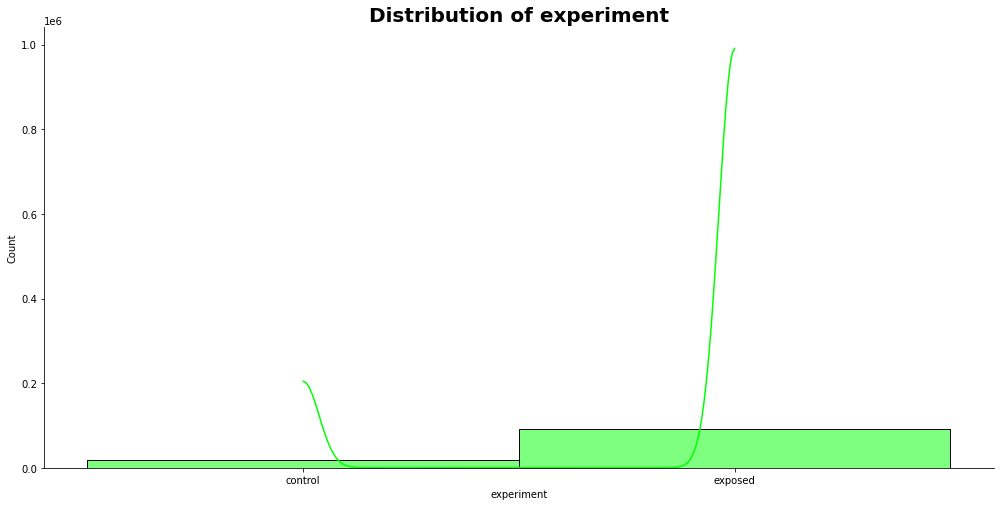

In [27]:
# histogram visual
fig = exploration.plot_hist(response,'experiment','lime')

* There are more number of exposed groups

In [28]:
# grouping by hour and its count
hour_data = response.groupby(['hour']).agg({'hour': ['count']})
hour_data.columns = ['count']
hour_data = hour_data.sort_values(by='count', ascending=False)
hour_data = hour_data.reset_index()
hour_data.head()

,hour,count
0,2,7840
1,3,7837
2,0,7746
3,1,7681
4,4,7591


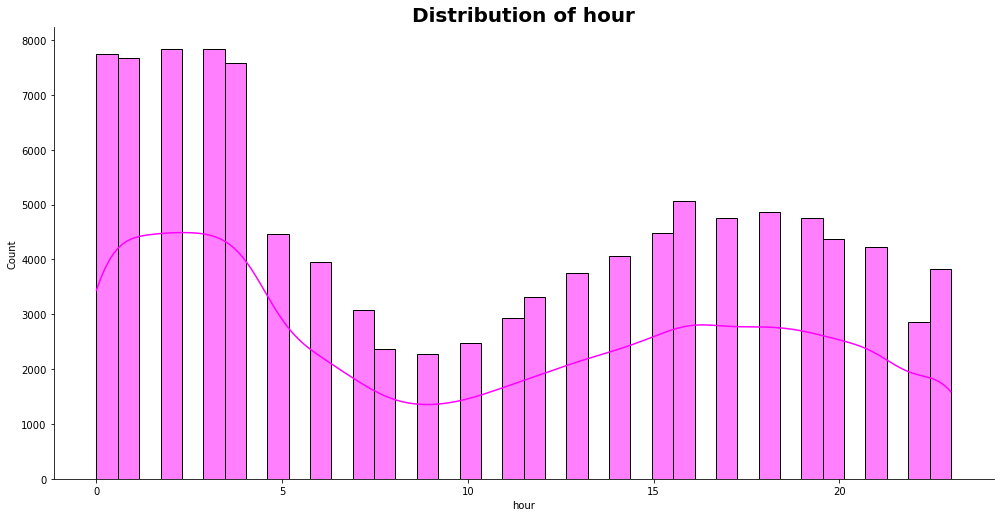

In [29]:
fig = exploration.plot_hist(response,'hour','magenta')

* There is much reaction for the Ad at the 2 and 3 hrs mark

In [30]:
# grouping by device_make and its count
device_data = response.groupby(['device_make']).agg({'device_make': ['count']})
device_data.columns = ['count']
device_data = device_data.sort_values(by='count', ascending=False)
device_data = device_data.reset_index()
device_data.head()

,device_make,count
0,Samsung,52766
1,Apple,27104
2,Google,23627
3,Motorola,2606
4,LG,1854


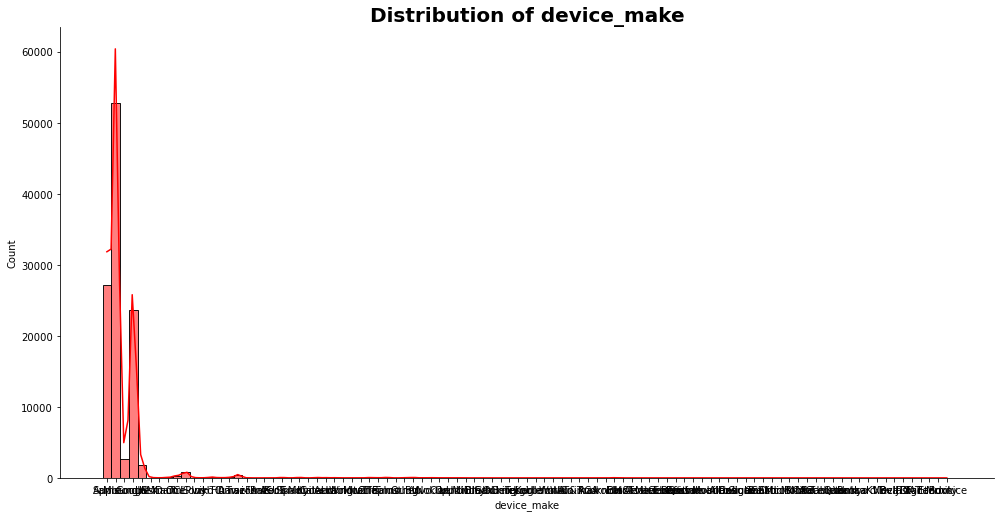

In [31]:
fig = exploration.plot_hist(response,'device_make','red')

* samsung takes the huge role at the Ad reaction platform

In [33]:
# grouping by browser and its count
browser_types = response.groupby(['browser']).agg({'browser': ['count']})
browser_types.columns = ['count']
browser_types = browser_types.sort_values(by='count', ascending=False)
browser_types = browser_types.reset_index()
browser_types.head()

,browser,count
0,6,72954
1,15,22489
2,7,14979
3,5,86
4,12,38


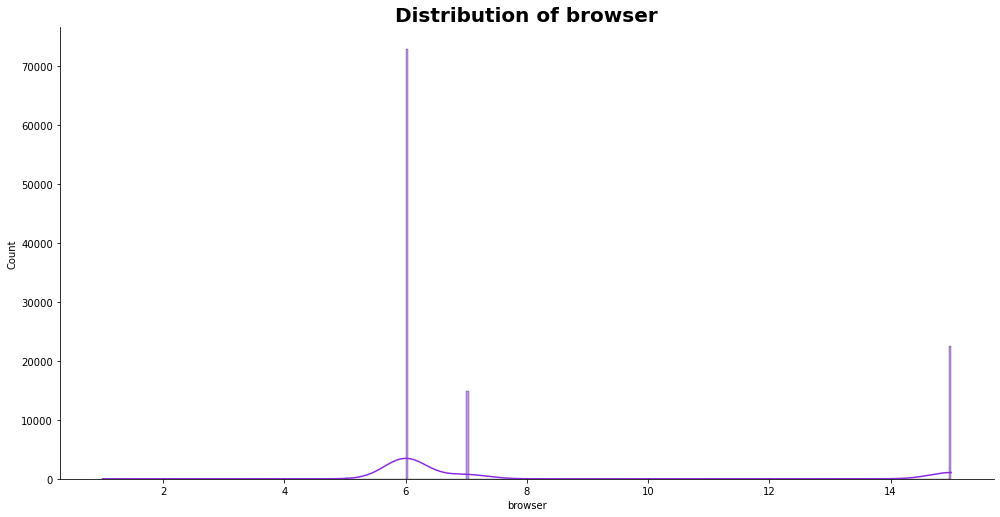

In [34]:
fig = exploration.plot_hist(response,'browser','blueviolet')

* label 6 browser is most widely used when accessing the Ad

In [35]:
# grouping by platform and its count
# browser_types = response['platform_os'].value_counts()
platform_os = response.groupby(['platform_os']).agg({'platform_os': ['count']})
platform_os.columns = ['count']
platform_os = platform_os.sort_values(by='count', ascending=False)
platform_os = platform_os.reset_index()
platform_os.head()

,platform_os,count
0,101,81907
1,162,9736
2,156,4889
3,178,4126
4,155,3730


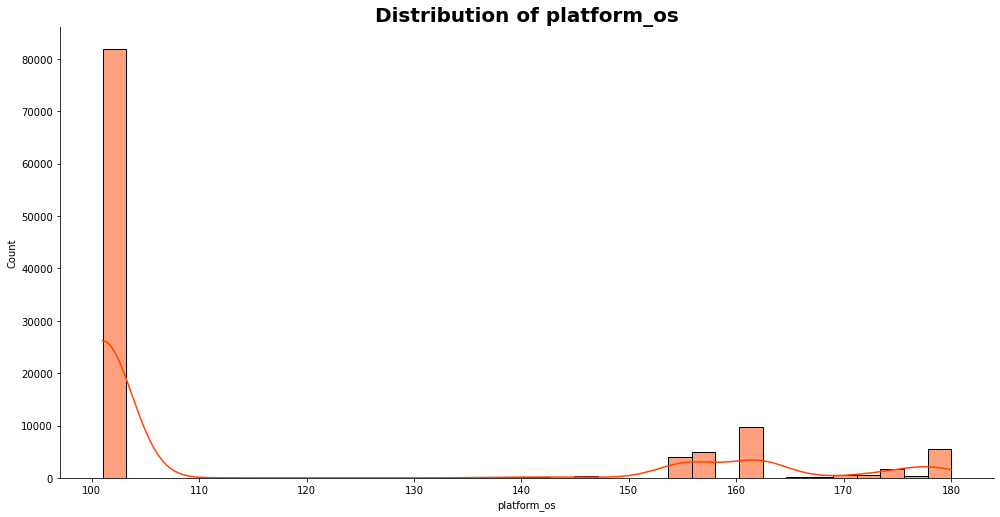

In [36]:
fig = exploration.plot_hist(response,'platform_os','orangered')

* Platform 6 is most widely used version on the reaction (latest)

In [37]:
# group by date and aggriagte all columns 
date_group_df = response.groupby('date').agg({'experiment':'count','hour':'sum','yes':'sum', 'no':'sum'})
date_group_df

,experiment,hour,yes,no
date,,,,
<built-in method date of Timestamp object at 0x7fc3352db2a0>,1,20,1,0
<built-in method date of Timestamp object at 0x7fc3352dbc00>,1,23,0,1
<built-in method date of Timestamp object at 0x7fc3352dd4f8>,1,6,1,0
<built-in method date of Timestamp object at 0x7fc3352de408>,1,10,1,0
<built-in method date of Timestamp object at 0x7fc3352df7c8>,1,5,1,0
...,...,...,...,...
<built-in method date of Timestamp object at 0x7fc344fa0228>,1,4,1,0
<built-in method date of Timestamp object at 0x7fc344fa3228>,1,7,1,0
<built-in method date of Timestamp object at 0x7fc344fa4a20>,1,16,1,0


In [38]:
# group by browser and aggregate all columns
browser_group_df = response.groupby('browser').agg(
    {'experiment': 'count', 'hour': 'sum', 'yes': 'sum', 'no':'sum'})
browser_group_df

,experiment,hour,yes,no
browser,,,,
1,14,106,8,6
5,86,964,66,20
6,72954,735050,66301,6653
7,14979,171153,8879,6100
8,10,102,10,0
12,38,389,29,9
15,22489,212825,17480,5009


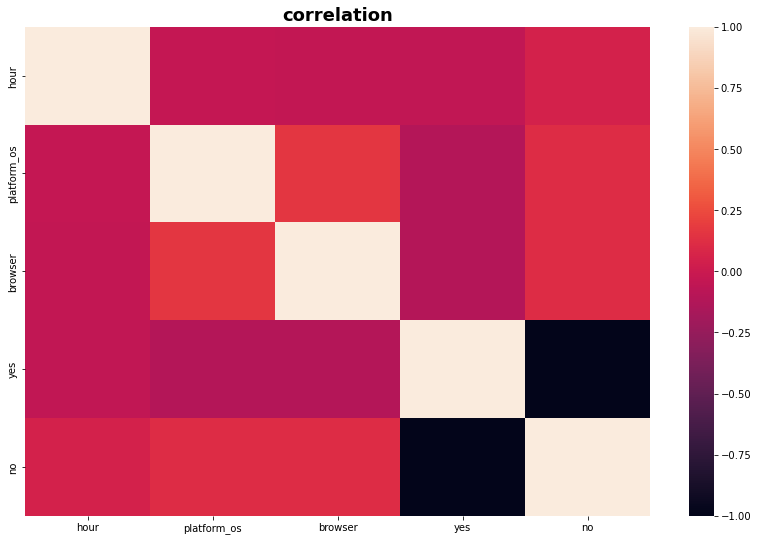

In [39]:
# correlation
exploration.plot_heatmap_from_correlation(response.corr(), "correlation")

In [40]:
# removing yes and no columns and replace it with response
# yes = 1 and No = 0
df1 = control_df[control_df['yes'] == 1].drop(['yes','no'], axis = 1)
df1['response'] = 1
df2 = control_df[control_df['no'] == 1].drop(['yes','no'], axis = 1)
df2['response'] = 0
control_plot_df = df1.append(df2).reset_index(drop=True)
control_plot_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,eb941471-f485-4516-b4d3-648e7838d53a,control,<built-in method date of Timestamp object at 0...,15,Apple,101,15,1
1,622af8e2-7bcf-4681-a921-442e1f8378f1,control,<built-in method date of Timestamp object at 0...,6,Apple,101,5,1
2,56a03982-6278-4083-9554-3a069dbc22c8,control,<built-in method date of Timestamp object at 0...,20,Samsung,162,6,1
3,2711e2f3-a624-4243-800e-693a888bc394,control,<built-in method date of Timestamp object at 0...,3,Samsung,162,6,1
4,822e43cb-47a4-4101-90bb-02e7e1c2f576,control,<built-in method date of Timestamp object at 0...,15,Apple,101,7,1


In [41]:
# removing yes and no columns and replace it with response
# yes = 1 and No = 0
df1 = exposed_df[exposed_df['yes'] == 1].drop(['yes','no'], axis = 1)
df1['response'] = 1
df2 = exposed_df[exposed_df['no'] == 1].drop(['yes','no'], axis = 1)
df2['response'] = 0
exposed_plot_df = df1.append(df2).reset_index(drop=True)
exposed_plot_df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,response
0,143da30d-ebde-467f-8d66-acc80a4ff898,exposed,<built-in method date of Timestamp object at 0...,19,Samsung,101,15,1
1,28304800-7650-4dae-84be-17e5b5c04868,exposed,<built-in method date of Timestamp object at 0...,4,Samsung,101,6,1
2,f6d8f3f7-75b6-45a2-a277-793f3b387398,exposed,<built-in method date of Timestamp object at 0...,8,Apple,101,7,1
3,dd0355b7-b1cd-4c87-bf70-2c2093dd61b2,exposed,<built-in method date of Timestamp object at 0...,0,Apple,163,7,1
4,9728e114-5e94-4fb9-a193-44766e2abc55,exposed,<built-in method date of Timestamp object at 0...,14,Samsung,162,6,1


In [42]:
# group by responses and there count for control data
control_yes_data = control_plot_df.groupby(['response']).agg({'response': ['count']})
control_yes_data.columns = ['count']
control_yes_data = control_yes_data.reset_index()
control_yes_data

,response,count
0,0,8258
1,1,10641


In [43]:
# group by responses and there count for exposed data
exposed_yes_data = exposed_plot_df.groupby(['response']).agg({'response': ['count']})
exposed_yes_data.columns = ['count']
exposed_yes_data = exposed_yes_data.reset_index()
exposed_yes_data

,response,count
0,0,9539
1,1,82132


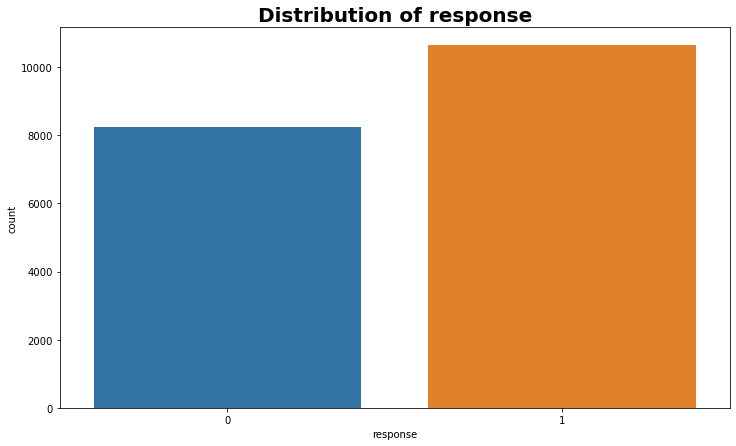

In [44]:
# yes and no response for control group
exploration.plot_count(control_plot_df, 'response')

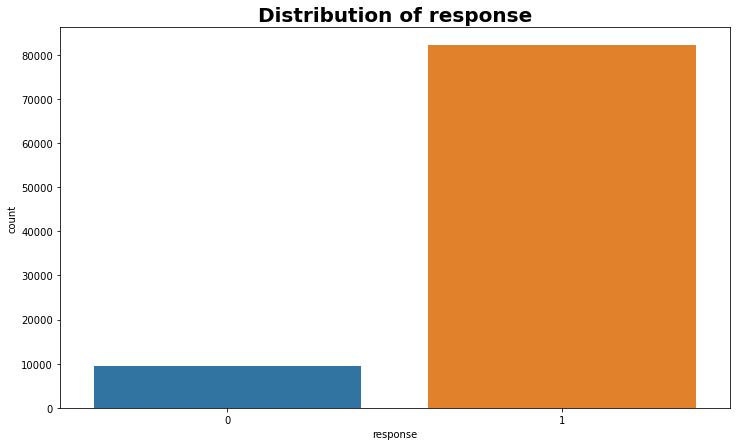

In [45]:
# yes and no response for exposed group
exploration.plot_count(exposed_plot_df, 'response')

* The respose for exposed group that says yes doubles when compared to control group
* There is a shift in answering yes for the exposed group than the control group, but it doesn't mean the creative add works well